In [13]:
import pandas as pd
from pycaret.classification import *

In [14]:
# Retrieve Training and Testing Data 
df_train = pd.read_csv('data/trainClean.csv')
df_test = pd.read_csv('data/testClean.csv')

cat_features = ['HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'FirstName', 'LastName',]
num_features = ['PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#PassengerId	HomePlanet	CryoSleep	Deck	Num	Side	Destination	Age	VIP	RoomService	FoodCourt	ShoppingMall	FirstName	LastName	Spa	VRDeck	Transported

,Description,Value
0,Session id,3834
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 17)"
4,Transformed data shape,"(8693, 37)"
5,Transformed train set shape,"(6085, 37)"
6,Transformed test set shape,"(2608, 37)"
7,Numeric features,6
8,Categorical features,10
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8041,0.8986,0.8062,0.8053,0.8055,0.6082,0.6087,1.0730
gbc,Gradient Boosting Classifier,0.8023,0.8931,0.8280,0.7899,0.8083,0.6044,0.6056,0.1860
lightgbm,Light Gradient Boosting Machine,0.7987,0.8943,0.7964,0.8027,0.7993,0.5974,0.5978,0.0890
rf,Random Forest Classifier,0.7962,0.8826,0.7546,0.8262,0.7883,0.5927,0.5956,0.1250
et,Extra Trees Classifier,0.7883,0.8670,0.7442,0.8197,0.7797,0.5769,0.5799,0.1020
ada,Ada Boost Classifier,0.7850,0.8776,0.8108,0.7738,0.7917,0.5699,0.5708,0.0640
lr,Logistic Regression,0.7758,0.8194,0.8868,0.7281,0.7993,0.5509,0.5655,0.6200
ridge,Ridge Classifier,0.7709,0.0000,0.7109,0.8115,0.7577,0.5422,0.5467,0.0210
lda,Linear Discriminant Analysis,0.7706,0.8557,0.7103,0.8114,0.7573,0.5416,0.5461,0.0260
dt,Decision Tree Classifier,0.7491,0.7490,0.7517,0.7514,0.7511,0.4981,0.4986,0.0250


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8030,0.8924,0.8436,0.7825,0.8119,0.6056,0.6075
1,0.8046,0.8894,0.8046,0.8072,0.8059,0.6092,0.6092
2,0.7668,0.8755,0.7818,0.7619,0.7717,0.5335,0.5337
3,0.8112,0.9067,0.8469,0.7927,0.8189,0.6221,0.6236
4,0.8161,0.9173,0.8241,0.8135,0.8188,0.6321,0.6322
5,0.7862,0.8785,0.7941,0.7839,0.7890,0.5723,0.5724
6,0.7928,0.8863,0.7974,0.7922,0.7948,0.5855,0.5855
7,0.8026,0.8814,0.7712,0.8252,0.7973,0.6054,0.6067
8,0.8355,0.9123,0.8693,0.8160,0.8418,0.6709,0.6724


[I 2023-11-19 15:33:41,769] Searching the best hyperparameters using 6085 samples...
[I 2023-11-19 15:35:29,106] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


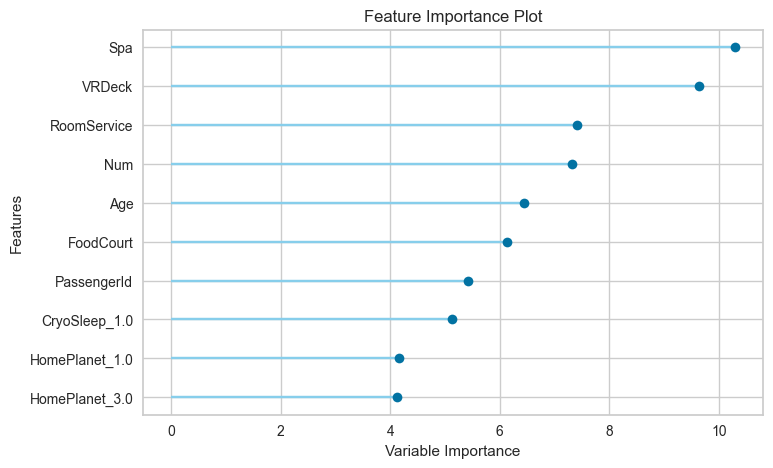

In [15]:
test = setup(df_train, target='Transported', categorical_features=cat_features, numeric_features=num_features)

best_model= compare_models()

#Example Logistic Regression
#lr_model = create_model('lr')
#tuned_lr = tune_model(lr_model, n_iter=10, search_library='optuna', search_algorithm='tpe', choose_better = True)

tuned_model = tune_model(best_model, n_iter=10, search_library='optuna', search_algorithm='tpe', choose_better = True)

# plot feature importance
plot_model(best_model, plot = 'feature')

In [16]:
pred = predict_model(tuned_model, data=df_test)
pred

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,FirstName,LastName,Spa,VRDeck,prediction_label,prediction_score
0,0013_01,1,1,7,3,2,3,27.0,0,0.0,0.0,0.0,1351,2359,0.0,0.0,0,0.5724
1,0018_01,1,0,6,4,2,3,19.0,0,0.0,9.0,0.0,1426,678,2823.0,0.0,0,0.9792
2,0019_01,3,1,3,0,2,1,31.0,0,0.0,0.0,0.0,13,609,0.0,0.0,1,0.9642
3,0021_01,3,0,3,1,2,3,38.0,0,0.0,6652.0,0.0,1454,1456,181.0,585.0,1,0.9555
4,0023_01,1,0,6,5,2,3,20.0,0,10.0,0.0,635.0,745,1537,0.0,0.0,1,0.5663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,7,1496,2,3,34.0,0,0.0,0.0,0.0,988,646,0.0,0.0,1,0.5982
4273,9269_01,1,0,0,0,0,3,42.0,0,0.0,847.0,17.0,1402,1299,10.0,144.0,1,0.5428
4274,9271_01,2,1,4,296,1,1,-1.0,0,0.0,0.0,0.0,625,2267,0.0,0.0,1,0.9814
4275,9273_01,3,0,4,297,1,0,-1.0,0,0.0,2680.0,0.0,1317,1393,0.0,523.0,1,0.8550


In [17]:
# Map Predictions to Binary Values
tfMap = { 0: False, 1: True }
pred['Transported'] = [tfMap[i] for i in pred['prediction_label']]

# Add PassengerId Column to Predictions
kaggleCSV = pd.merge(df_test[['PassengerId']], pred[['Transported']], left_index=True, right_index=True)

# Save Predictions to CSV
kaggleCSV.to_csv('results/example_results.csv', index=False)